<a href="https://colab.research.google.com/github/Ayushsinghpanwar/lumpy_project/blob/main/lumpynew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:

# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import lumpy dataset

In [4]:
# call api to fetch the dataset from kaggle
!kaggle datasets download -d ayushpanwar058/lumpy-cow-dataset

Dataset URL: https://www.kaggle.com/datasets/ayushpanwar058/lumpy-cow-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
 96% 152M/159M [00:01<00:00, 148MB/s]
100% 159M/159M [00:01<00:00, 147MB/s]


In [5]:
# extracting the zip file to the compresed dataset
from zipfile import ZipFile
dataset ='/content/lumpy-cow-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extracted ')

dataset is extracted 


In [6]:
!ls

kaggle.json  lumpy-cow-dataset.zip  lumpylargedataset  sample_data


importing the dependeies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
lumpy_affected_files = os.listdir('/content/lumpylargedataset/Lumpy Skin Images Dataset/Lumpy Skin')
print(lumpy_affected_files[0:5])
print(lumpy_affected_files[-5:])

['img1212.jpg', 'Lumpy_Skin_213.png', 'img1220.jpg', 'Lumpy_Skin_318.png', 'img1056.jpg']
['img1339.jpg', 'img1289.jpg', 'img1292.jpg', 'img1260.jpg', 'img1282.jpg']


In [9]:
lumpy_notaffected_files = os.listdir('/content/lumpylargedataset/Lumpy Skin Images Dataset/Normal Skin')
print(lumpy_notaffected_files[0:5])
print(lumpy_notaffected_files[-5:])

['Normal_Skin_52.png', 'Normal_Skin_232.png', 'Normal_Skin_7.png', 'Normal_Skin_231.png', 'Normal_Skin_572.png']
['Normal_Skin_298.png', 'Normal_Skin_16.png', 'Normal_Skin_131.png', 'Normal_Skin_654.png', 'Normal_Skin_645.png']


In [10]:
print('number of lumpy affected image', len(lumpy_affected_files))
print('number of not lumpy affected image', len(lumpy_notaffected_files))


number of lumpy affected image 745
number of not lumpy affected image 700


creating labels for two class of images

lumpy affected --> 1 lumpy not affected -->0

In [11]:
#create the labels

lumpy_affected = [1]*745

lumpy_notaffected = [0]*700

In [12]:
print(lumpy_affected[0:5])
print(lumpy_notaffected[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(lumpy_affected))
print(len(lumpy_notaffected))

745
700


In [14]:
total_data= lumpy_affected + lumpy_notaffected
print(len(total_data))
print(total_data[0:5])
print(total_data[-5:])

1445
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying the images

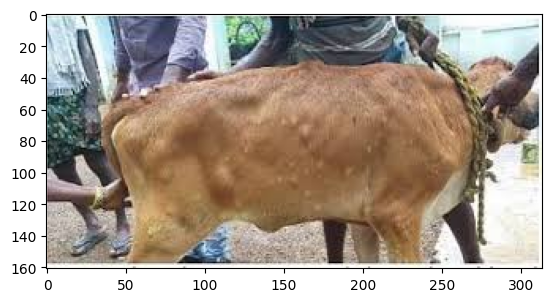

In [15]:
#displaying lumpy affected
img = mpimg.imread('/content/lumpylargedataset/Lumpy Skin Images Dataset/Lumpy Skin/img1041.jpg')
imgplot = plt.imshow(img)
plt.show()

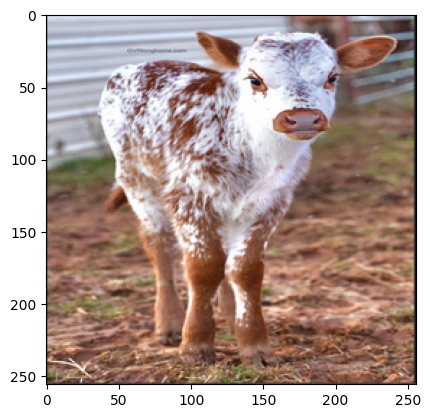

In [16]:
#displaying lumpy not affected
img = mpimg.imread('/content/lumpylargedataset/Lumpy Skin Images Dataset/Normal Skin/Normal_Skin_36.png')
imgplot = plt.imshow(img)
plt.show()

image processing

resize the image

convert the image to numpy arrays

In [17]:
# convert image to numpy array
with_lumpy_path = '/content/lumpylargedataset/Lumpy Skin Images Dataset/Lumpy Skin/'

data = []

for img_file in lumpy_affected_files:

  image= Image.open(with_lumpy_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


with_notlumpy_path = '/content/lumpylargedataset/Lumpy Skin Images Dataset/Normal Skin/'

for img_file in lumpy_notaffected_files:

  image= Image.open(with_notlumpy_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

1445

array([[[136, 172,  72],
        [136, 172,  72],
        [131, 167,  67],
        ...,
        [114, 149,  57],
        [114, 149,  57],
        [122, 157,  65]],

       [[136, 173,  72],
        [133, 170,  68],
        [135, 171,  70],
        ...,
        [121, 156,  63],
        [124, 159,  66],
        [130, 165,  72]],

       [[131, 168,  64],
        [128, 165,  61],
        [130, 167,  63],
        ...,
        [126, 161,  67],
        [125, 160,  66],
        [127, 162,  68]],

       ...,

       [[140, 176,  70],
        [155, 191,  85],
        [135, 171,  66],
        ...,
        [147, 177,  62],
        [128, 158,  44],
        [155, 185,  70]],

       [[145, 181,  75],
        [149, 185,  79],
        [146, 182,  76],
        ...,
        [156, 187,  69],
        [162, 193,  75],
        [161, 192,  73]],

       [[158, 193,  90],
        [126, 162,  56],
        [120, 156,  50],
        ...,
        [144, 176,  54],
        [155, 187,  65],
        [151, 182,  60]]], dtype=uint8)
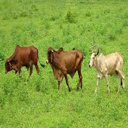

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(total_data)

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [26]:
print(x.shape)
print(y.shape)

(1445, 128, 128, 3)
(1445,)


In [27]:
print(y)

[1 1 1 ... 0 0 0]


train test split data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,  y, test_size= 0.1, random_state=2)

In [29]:
print(x.shape, x_train.shape,x_test.shape)

(1445, 128, 128, 3) (1300, 128, 128, 3) (145, 128, 128, 3)


In [30]:
# scalling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

array([[[ 86, 125, 199],
        [ 71, 103, 181],
        [ 70, 101, 179],
        ...,
        [ 71, 109, 195],
        [ 75, 117, 202],
        [ 79, 121, 202]],

       [[ 75, 119, 201],
        [ 69, 103, 184],
        [ 67,  94, 172],
        ...,
        [ 71, 109, 194],
        [ 72, 115, 200],
        [ 80, 121, 201]],

       [[ 71, 106, 190],
        [ 72, 104, 187],
        [ 72, 110, 194],
        ...,
        [ 72, 113, 197],
        [ 70, 111, 198],
        [ 70, 106, 191]],

       ...,

       [[160,  85,  60],
        [154,  79,  56],
        [135,  57,  37],
        ...,
        [158,  79,  52],
        [141,  63,  39],
        [130,  52,  32]],

       [[160,  82,  57],
        [146,  69,  46],
        [139,  61,  40],
        ...,
        [135,  57,  40],
        [130,  52,  34],
        [133,  53,  36]],

       [[162,  87,  59],
        [149,  73,  50],
        [140,  64,  45],
        ...,
        [123,  50,  35],
        [129,  53,  36],
        [125,  50,  34]]], dtype=uint8)
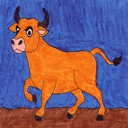

In [31]:
x_train[0]

In [32]:
x_train_scaled[0]

array([[[0.3372549 , 0.49019608, 0.78039216],
        [0.27843137, 0.40392157, 0.70980392],
        [0.2745098 , 0.39607843, 0.70196078],
        ...,
        [0.27843137, 0.42745098, 0.76470588],
        [0.29411765, 0.45882353, 0.79215686],
        [0.30980392, 0.4745098 , 0.79215686]],

       [[0.29411765, 0.46666667, 0.78823529],
        [0.27058824, 0.40392157, 0.72156863],
        [0.2627451 , 0.36862745, 0.6745098 ],
        ...,
        [0.27843137, 0.42745098, 0.76078431],
        [0.28235294, 0.45098039, 0.78431373],
        [0.31372549, 0.4745098 , 0.78823529]],

       [[0.27843137, 0.41568627, 0.74509804],
        [0.28235294, 0.40784314, 0.73333333],
        [0.28235294, 0.43137255, 0.76078431],
        ...,
        [0.28235294, 0.44313725, 0.77254902],
        [0.2745098 , 0.43529412, 0.77647059],
        [0.2745098 , 0.41568627, 0.74901961]],

       ...,

       [[0.62745098, 0.33333333, 0.23529412],
        [0.60392157, 0.30980392, 0.21960784],
        [0.52941176, 0

buiding a convolutional neural networks (cnn)

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2 # lummpy ,not lumpy

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [35]:
#complie the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
#trainig the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
33/33 [==============================] - 8s 56ms/step - loss: 0.9414 - acc: 0.5240 - val_loss: 0.6863 - val_acc: 0.6231
Epoch 2/10
33/33 [==============================] - 1s 22ms/step - loss: 0.6616 - acc: 0.6144 - val_loss: 0.6054 - val_acc: 0.6846
Epoch 3/10
33/33 [==============================] - 1s 19ms/step - loss: 0.5982 - acc: 0.7240 - val_loss: 0.6090 - val_acc: 0.7500
Epoch 4/10
33/33 [==============================] - 1s 19ms/step - loss: 0.5032 - acc: 0.7827 - val_loss: 0.6621 - val_acc: 0.6692
Epoch 5/10
33/33 [==============================] - 1s 19ms/step - loss: 0.4512 - acc: 0.8058 - val_loss: 0.7743 - val_acc: 0.7000
Epoch 6/10
33/33 [==============================] - 1s 22ms/step - loss: 0.3881 - acc: 0.8519 - val_loss: 0.8090 - val_acc: 0.6500
Epoch 7/10
33/33 [==============================] - 1s 19ms/step - loss: 0.2891 - acc: 0.8827 - val_loss: 0.6689 - val_acc: 0.7654
Epoch 8/10
33/33 [==============================] - 1s 20ms/step - loss: 0.2572 - a

model evalution

In [37]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test accuracy = ', accuracy)

5/5 [==============================] - 0s 34ms/step - loss: 0.8982 - acc: 0.7103
Test accuracy =  0.7103448510169983


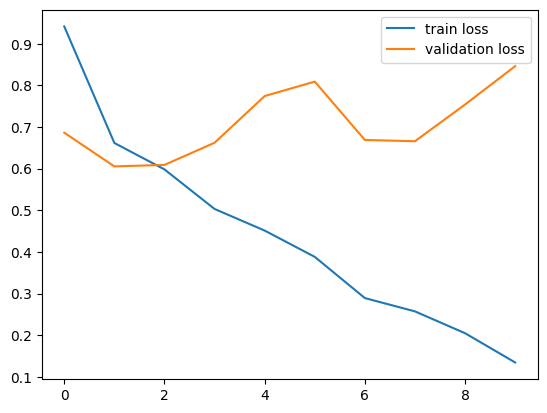

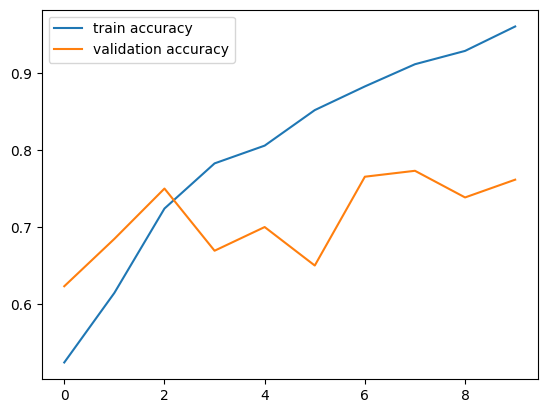

In [38]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()



predictive system

In [ ]:
input_image_path = input('path of the image to be predicted : ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('lumpy affected ')

else:
   print('lumpy not affected ')